In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from scipy import signal
from scipy import fftpack
from scipy.ndimage import gaussian_filter

from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

In [2]:
image = cv.imread("img1.png")

### 	Filtro da Mediana

In [3]:
#filtro com 3
median_tres = cv.medianBlur(image, 3)
#filtro com 5
median_cinco = cv.medianBlur(image, 5)
#filtro com 7
median_sete = cv.medianBlur(image, 7)

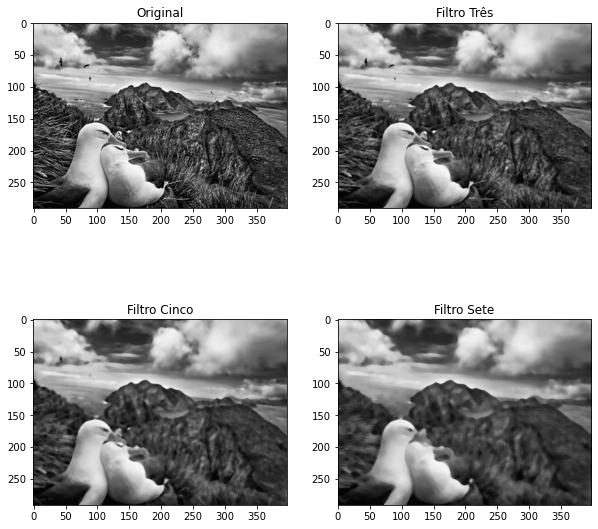

In [4]:
#plot do filtro com 3
f, axarr = plt.subplots(2,2,figsize=(10,10)) ;
axarr[0][0].title.set_text("Original")
axarr[0][1].title.set_text("Filtro Três")
axarr[1][0].title.set_text("Filtro Cinco")
axarr[1][1].title.set_text("Filtro Sete")
axarr[0][0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB));
axarr[0][1].imshow(cv.cvtColor(median_tres, cv.COLOR_BGR2RGB));
axarr[1][0].imshow(cv.cvtColor(median_cinco, cv.COLOR_BGR2RGB));
axarr[1][1].imshow(cv.cvtColor(median_sete, cv.COLOR_BGR2RGB));

### 	Filtro Gaussiano (Gaussian) 

In [5]:
#filtro com 3
gauss_tres = cv.GaussianBlur(image, (3,3), 0)
#filtro com 5
gauss_cinco = cv.GaussianBlur(image, (5,5), 0)
#filtro com 7
gauss_sete = cv.GaussianBlur(image, (7,7), 0)

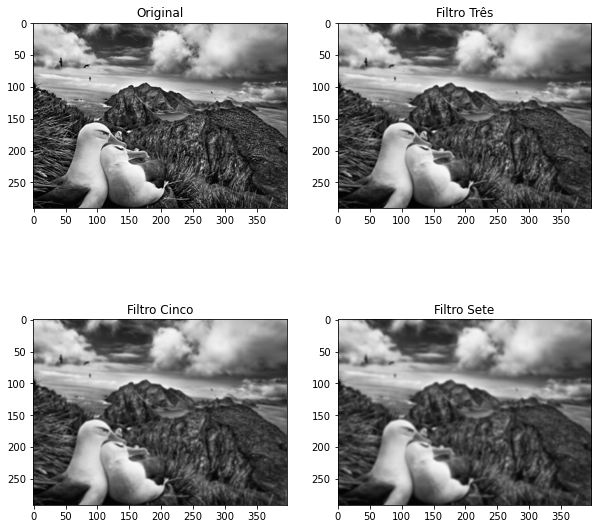

In [6]:
f, axarr = plt.subplots(2,2,figsize=(10,10)) ;
axarr[0][0].title.set_text("Original")
axarr[0][1].title.set_text("Filtro Três")
axarr[1][0].title.set_text("Filtro Cinco")
axarr[1][1].title.set_text("Filtro Sete")
axarr[0][0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB));
axarr[0][1].imshow(cv.cvtColor(gauss_tres, cv.COLOR_BGR2RGB));
axarr[1][0].imshow(cv.cvtColor(gauss_cinco, cv.COLOR_BGR2RGB));
axarr[1][1].imshow(cv.cvtColor(gauss_sete, cv.COLOR_BGR2RGB));

### 	Filtro da Média Aritmética

In [7]:
blur_tres = cv.blur(image,(3,3))
blur_cinco = cv.blur(image,(5,5))
blur_sete = cv.blur(image,(7,7))

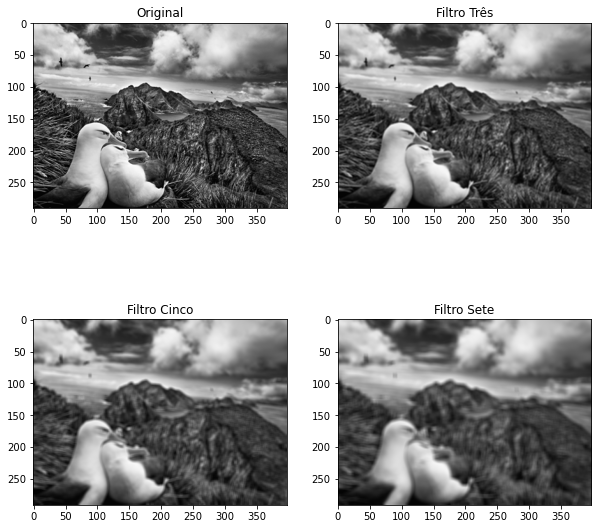

In [8]:
f, axarr = plt.subplots(2,2,figsize=(10,10)) ;
axarr[0][0].title.set_text("Original")
axarr[0][1].title.set_text("Filtro Três")
axarr[1][0].title.set_text("Filtro Cinco")
axarr[1][1].title.set_text("Filtro Sete")
axarr[0][0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB));
axarr[0][1].imshow(cv.cvtColor(blur_tres, cv.COLOR_BGR2RGB));
axarr[1][0].imshow(cv.cvtColor(blur_cinco, cv.COLOR_BGR2RGB));
axarr[1][1].imshow(cv.cvtColor(blur_sete, cv.COLOR_BGR2RGB));

In [9]:
image2 = cv.imread("img2.jpg",cv.IMREAD_GRAYSCALE)

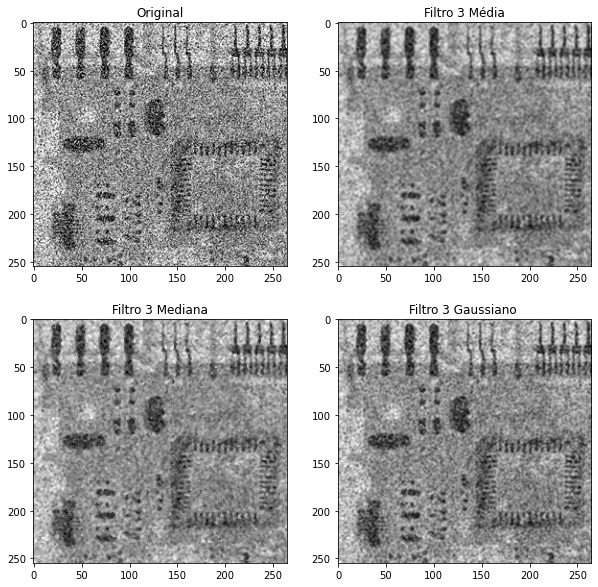

In [10]:
kernel = 3

f, axarr = plt.subplots(2,2,figsize=(10,10)) ;
axarr[0][0].title.set_text("Original")
axarr[0][1].title.set_text("Filtro "+str(kernel)+ " Média")
axarr[1][0].title.set_text("Filtro "+str(kernel)+ " Mediana")
axarr[1][1].title.set_text("Filtro "+str(kernel)+ " Gaussiano ")

axarr[0][0].imshow(image2, cmap='gray');
axarr[0][1].imshow(cv.blur(image2,(kernel ,kernel )), cmap='gray');
axarr[1][0].imshow(cv.medianBlur(image2,(kernel )), cmap='gray');
axarr[1][1].imshow(cv.GaussianBlur(image2, (kernel ,kernel ), 0), cmap='gray');

O filtro da mediana tem visualmente o melhor resultado.

In [11]:
image3 = cv.imread("img3.png",cv.IMREAD_GRAYSCALE)

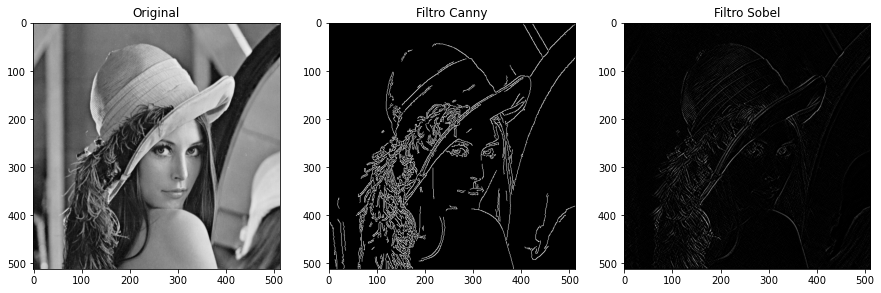

In [12]:
f, axarr = plt.subplots(1,3,figsize=(15,15)) ;
axarr[0].title.set_text("Original")
axarr[1].title.set_text("Filtro Canny")
axarr[2].title.set_text("Filtro Sobel")


axarr[0].imshow(image3, cmap='gray');
axarr[1].imshow(cv.Canny(image3,100,200), cmap='gray');
axarr[2].imshow(cv.Sobel(image3, -1, 1, 1), cmap='gray');


### Filtro Butterworth (Passa-Baixa)

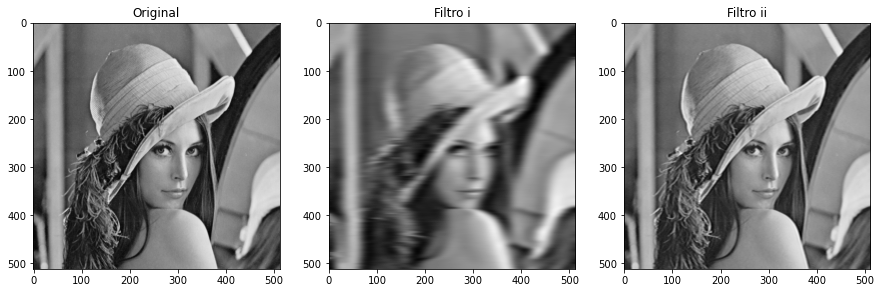

In [13]:
#i.	Parâmetros: (n=4) | (D0 ou cutoff =0.05)
#ii.	Parâmetros: (n=4) | (D0 ou cutoff =0.3)


b1, a1 = signal.butter(4, 0.05,btype='lowpass')
b2, a2 = signal.butter(4, 0.3,btype='lowpass' )

f, axarr = plt.subplots(1,3,figsize=(15,15)) ;
axarr[0].title.set_text("Original")
axarr[1].title.set_text("Filtro i")
axarr[2].title.set_text("Filtro ii")

axarr[0].imshow(image3, cmap='gray');
axarr[1].imshow(signal.filtfilt(b1, a1,image3), cmap='gray');
#axarr[1].imshow(fftpack.ifft2(signal.filtfilt(b1, a1, fftpack.fft2(image3))).real, cmap='gray');


axarr[2].imshow(signal.filtfilt(b2, a2,image3), cmap='gray');
#axarr[2].imshow(fftpack.ifft2(signal.filtfilt(b2, a2, fftpack.fft2(image3))).real, cmap='gray');



### 	Filtro Butterworth (Passa-Alta)

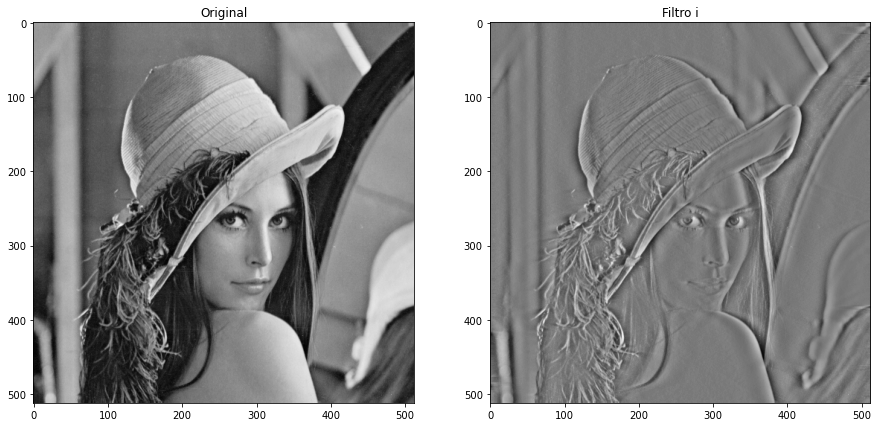

In [14]:
b3, a3 = signal.butter(4, 0.05,btype='highpass')

f, axarr = plt.subplots(1,2,figsize=(15,15)) ;
axarr[0].title.set_text("Original")
axarr[1].title.set_text("Filtro i")


axarr[0].imshow(image3, cmap='gray');
#axarr[1].imshow(fftpack.ifft2(signal.filtfilt(b3, a3, fftpack.fft2(image3))).real, cmap='gray');
axarr[1].imshow(signal.filtfilt(b3, a3,image3), cmap='gray');

### 	Filtro Gaussiano (Passa-Baixa)

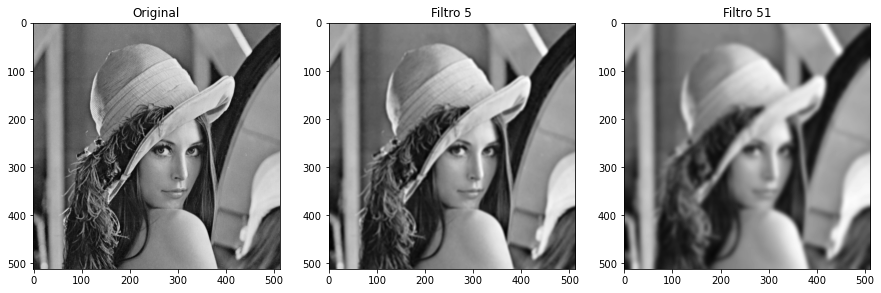

In [15]:


f, axarr = plt.subplots(1,3,figsize=(15,15)) ;
axarr[0].title.set_text("Original")
axarr[1].title.set_text("Filtro 5")
axarr[2].title.set_text("Filtro 51")

axarr[0].imshow(image3, cmap='gray');

axarr[1].imshow(cv.GaussianBlur(image3,(5,5),cv.BORDER_DEFAULT) ,cmap='gray');
#axarr[1].imshow(gaussian_filter(image3, sigma=5),cmap='gray');
#axarr[1].imshow(fftpack.ifft2(gaussian_filter(fftpack.fft2(image3).real,sigma=5)).real, cmap='gray');

axarr[2].imshow(cv.GaussianBlur(image3,(51,51),cv.BORDER_DEFAULT) ,cmap='gray');
#axarr[2].imshow(gaussian_filter(image3, sigma=51),cmap='gray');
#axarr[2].imshow(fftpack.ifft2(gaussian_filter(fftpack.fft2(image3).real,sigma=51)).real, cmap='gray');







In [16]:
image4 = cv.imread("img4.jpg")

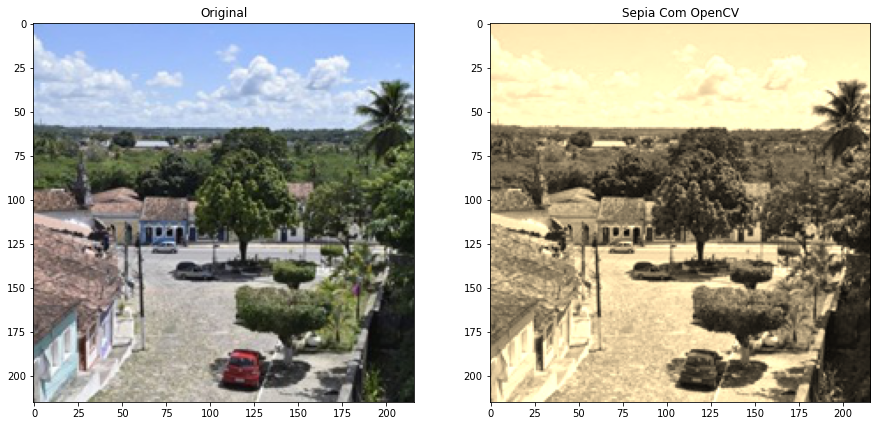

In [17]:
kernel =np.float32([
    [0.393, 0.769, 0.189],       
    [0.349, 0.686 , 0.168 ],
    [0.272, 0.534, 0.131]
])


f, axarr = plt.subplots(1,2,figsize=(15,15)) ;
axarr[0].title.set_text("Original")
axarr[1].title.set_text("Sepia Com OpenCV")


axarr[0].imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB));
axarr[1].imshow(cv.transform(image4, kernel));

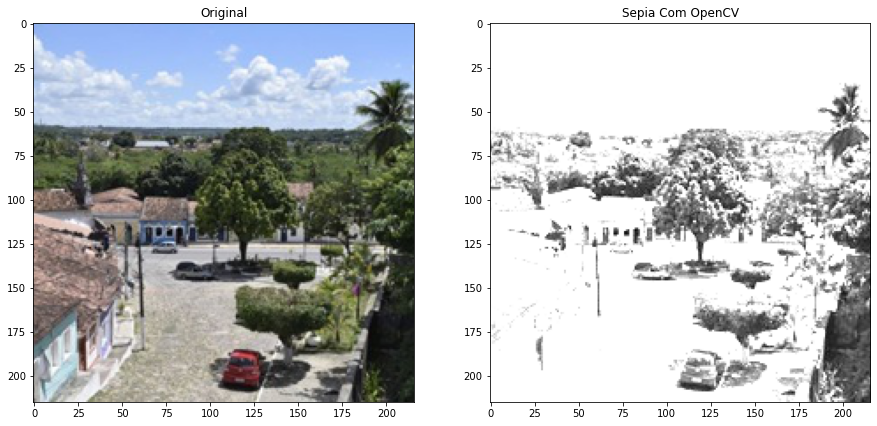

In [30]:
kernel =np.float32([
    [1, 1, 1],       
    [1, 1 , 1 ],
    [1, 1, 1]
])


f, axarr = plt.subplots(1,2,figsize=(15,15)) ;
axarr[0].title.set_text("Original")
axarr[1].title.set_text("Sepia Com OpenCV")


axarr[0].imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB));
axarr[1].imshow(cv.transform(image4, kernel));

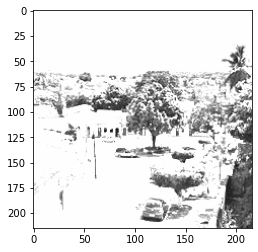

In [34]:
plt.imshow(255+cv.transform(image4, kernel))

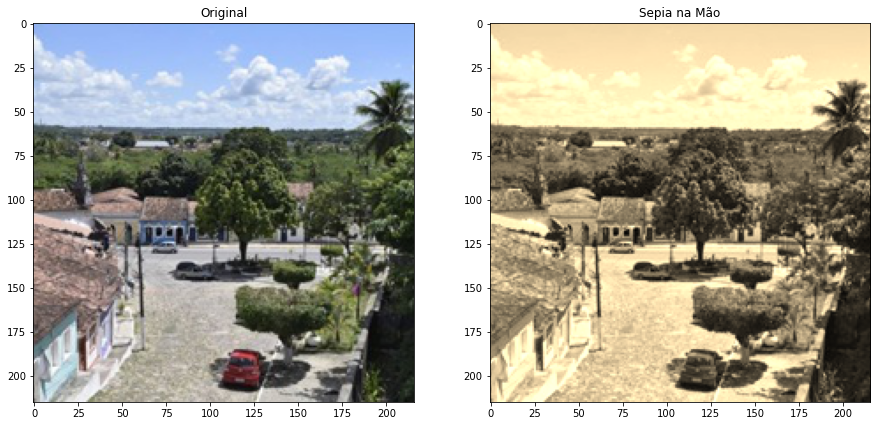

In [18]:
h,w,c = image4.shape
image_out = image4.copy()
for i in range(h):
    for j in range(w):
        b = image4[i,j,0]
        g = image4[i,j,1]
        r = image4[i,j,2]
        
        tr = int(0.393 * r + 0.769 * g + 0.189 * b)
        tg = int(0.349 * r + 0.686 * g + 0.168 * b)
        tb = int(0.272 * r + 0.534 * g + 0.131 * b)
        
        if tr > 255:
            tr = 255

        if tg > 255:
            tg = 255

        if tb > 255:
            tb = 255
        
        image_out[i,j,0] = tb
        image_out[i,j,1] = tg
        image_out[i,j,2] = tr
        
f, axarr = plt.subplots(1,2,figsize=(15,15)) ;
axarr[0].title.set_text("Original")
axarr[1].title.set_text("Sepia na Mão")


axarr[0].imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB));
axarr[1].imshow(cv.cvtColor(image_out, cv.COLOR_BGR2RGB));

In [19]:

image5 = cv.imread("img5.jpg", cv.IMREAD_GRAYSCALE)

multiplicador = 5
dim = (image5.shape[1]*multiplicador,image5.shape[0]*multiplicador)
resized = cv.resize(image5, dim, interpolation = cv.INTER_AREA)
resized = gaussian_filter(resized, sigma=5)


In [20]:
th = cv.adaptiveThreshold(resized,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

In [23]:

kernel = np.ones((5,5), np.uint8) 
img_dilation = cv.dilate(255-th, kernel, iterations=1)
kernel = np.ones((3,3), np.uint8) 
img_erosion = cv.erode(img_dilation,kernel , iterations=1) 

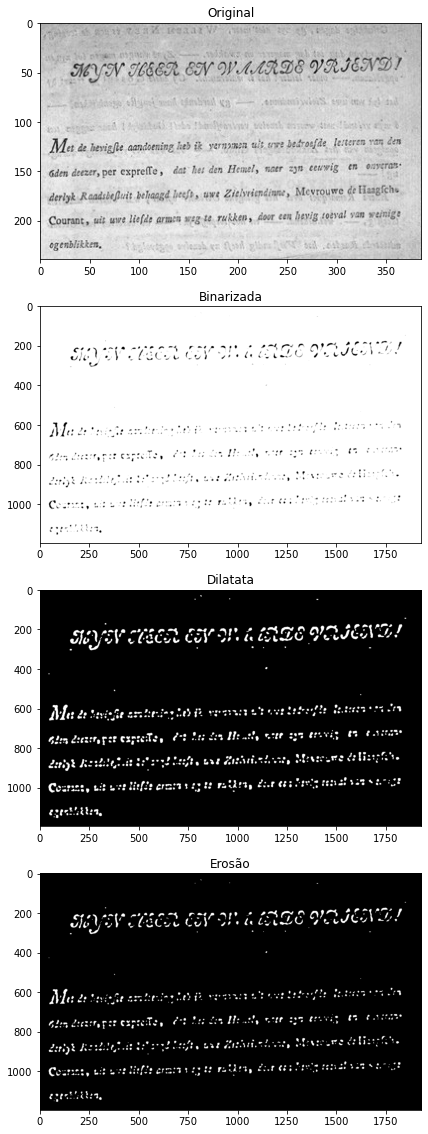

In [24]:
f, axarr = plt.subplots(4,1,figsize=(20,20)) ;
axarr[0].title.set_text("Original")
axarr[1].title.set_text("Binarizada")
axarr[2].title.set_text("Dilatata")
axarr[3].title.set_text("Erosão")

axarr[0].imshow(image5,cmap="gray");
axarr[1].imshow(th,cmap="gray");
axarr[2].imshow(img_dilation,cmap="gray");
axarr[3].imshow(img_erosion,cmap="gray");
